<a href="https://colab.research.google.com/github/tafartech/Tafarix.github.io/blob/main/Vanna1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 783.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import vanna
from vanna.remote import VannaDefault

In [ ]:
api_key = vanna.get_api_key('tafartechlabs@gmail.com')

Check your email for the code and enter it here: 1K6GE4


In [ ]:
vanna_model_name = 'chinook' # This is the name of the RAG model. This is typically associated with a specific dataset.
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [ ]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

Ask Questions

SELECT ar.ArtistId, ar.Name AS ArtistName, COUNT(DISTINCT al.AlbumId) AS TotalAlbumsSold
FROM Artist ar
INNER JOIN Album al ON ar.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY ar.ArtistId, ar.Name
ORDER BY TotalAlbumsSold DESC
LIMIT 10;


,ArtistId,ArtistName,TotalAlbumsSold
0,90,Iron Maiden,21
1,22,Led Zeppelin,14
2,58,Deep Purple,11
3,50,Metallica,10
4,150,U2,10
5,114,Ozzy Osbourne,6
6,118,Pearl Jam,5
7,21,Various Artists,4
8,82,Faith No More,4
9,84,Foo Fighters,4


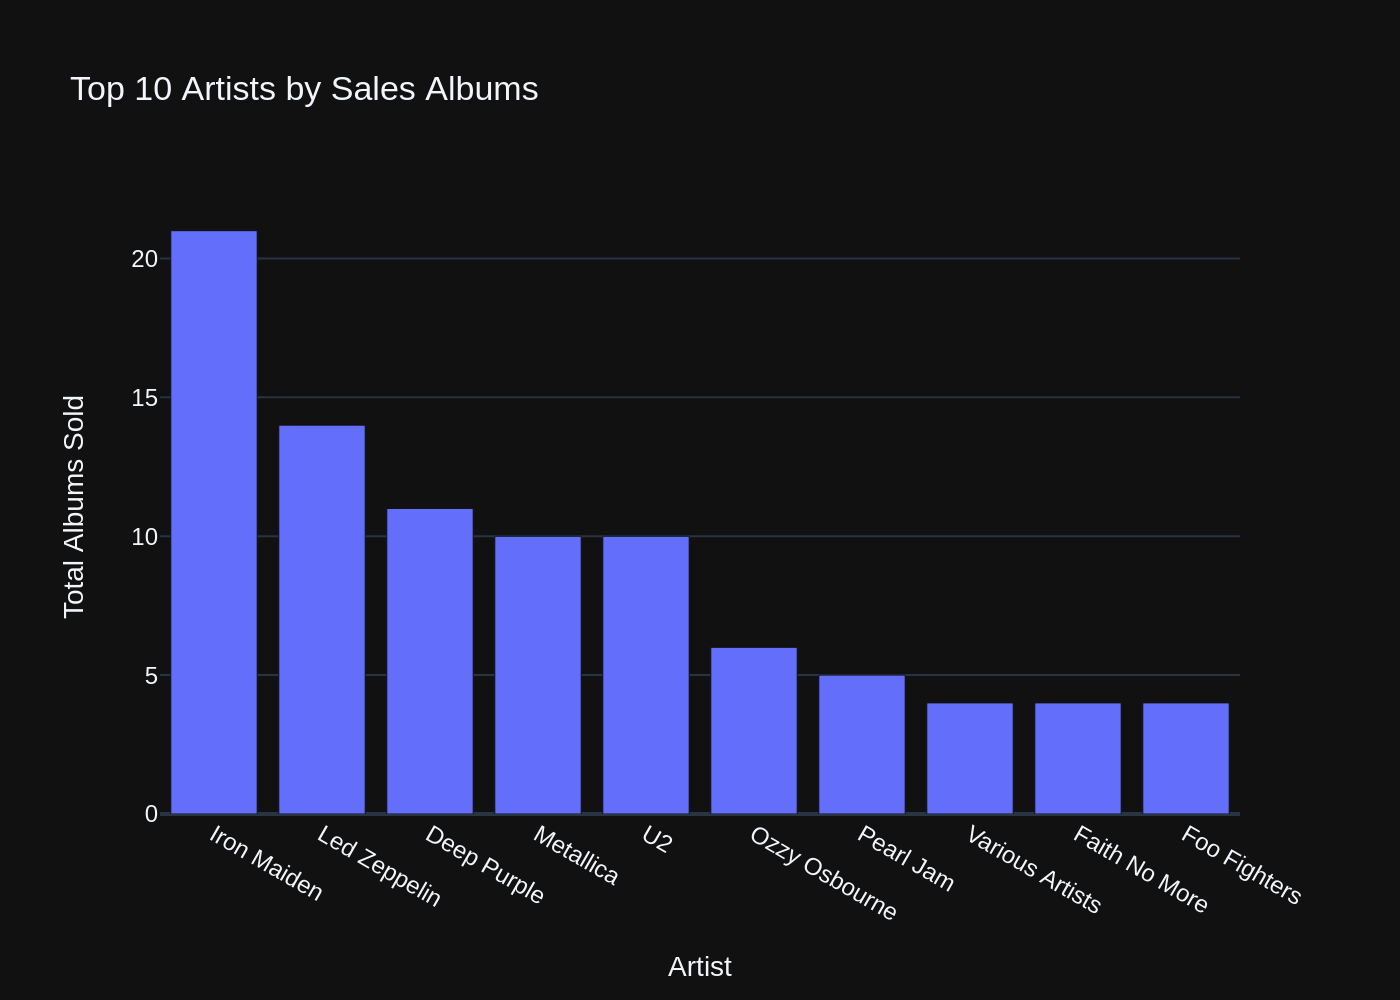

In [ ]:
vn.ask("What are the top 10 artists by sales albums?")

In [ ]:
vn.ask("What are the best playlists by artist rank?")

SELECT p.PlaylistId, p.Name AS PlaylistName, ar.Rank AS ArtistRank
FROM Playlist p
INNER JOIN PlaylistTrack pt ON p.PlaylistId = pt.PlaylistId
INNER JOIN Track t ON pt.TrackId = t.TrackId
INNER JOIN Album al ON t.AlbumId = al.AlbumId
INNER JOIN Artist ar ON al.ArtistId = ar.ArtistId
ORDER BY ar.Rank DESC;
Couldn't run sql:  Execution failed on sql 'SELECT p.PlaylistId, p.Name AS PlaylistName, ar.Rank AS ArtistRank
FROM Playlist p
INNER JOIN PlaylistTrack pt ON p.PlaylistId = pt.PlaylistId
INNER JOIN Track t ON pt.TrackId = t.TrackId
INNER JOIN Album al ON t.AlbumId = al.AlbumId
INNER JOIN Artist ar ON al.ArtistId = ar.ArtistId
ORDER BY ar.Rank DESC;': no such column: ar.Rank


Launch users Interface

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://c4108k01438-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
